<Center style="font-family: 'Helvetica Neue' ;font-size:35px; letter-spacing: 0.0625em ; color:white;background-image:url('black.jpg');padding:10px">Super Market Sales</Center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set_style("darkgrid")

In [2]:
sms_data = pd.read_csv("SuperMarketSales.csv")
sms_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Data Exploration

In [3]:
sms_data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [4]:
sms_data.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  7
Quantity                   20
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [5]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            924 non-null    object 
 4   Gender                   1003 non-null   object 
 5   Product line             960 non-null    object 
 6   Unit price               996 non-null    float64
 7   Quantity                 983 non-null    float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1003 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

In [6]:
sms_data.shape

(1003, 17)

In [7]:
sms_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,8.886215e-16,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


In [8]:
sms_data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [9]:
sms_data.duplicated().sum()

3

In [10]:
sms_data.drop_duplicates(inplace = True)

## Univariate Analysis

<Font color="gray">Univarient analysis is the analysis involving the single variable without consindering the relation with the another variable</Font>

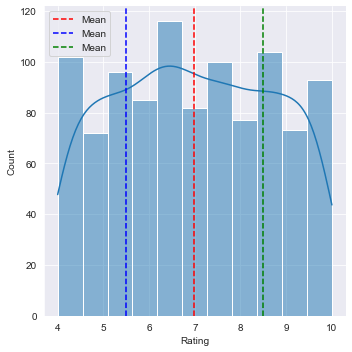

In [11]:
sns.displot(sms_data['Rating'] , kde = True)
plt.axvline(x = np.mean(sms_data['Rating']) ,c = 'red' , ls="--" , label = "Mean" )
plt.axvline(x = np.percentile(sms_data['Rating'] , 25) ,c = 'blue' , ls="--" , label = "Mean" )
plt.axvline(x = np.percentile(sms_data['Rating'] , 75) ,c = 'green' , ls="--" , label = "Mean" )
plt.legend()
plt.title("")
plt.show()

<Font color="gray">
    <ul>
        <li>The rating distribution look uniform and there is not skewness on the left and right</li>
        <li>The red-line is the mean</li>
        <li>The blue-line is the 25th percentile</li>
        <li>The green-line is the 75th percentile</li>
    </ul>
</Font>


Text(0, 0.5, 'Total Sales per Branch')

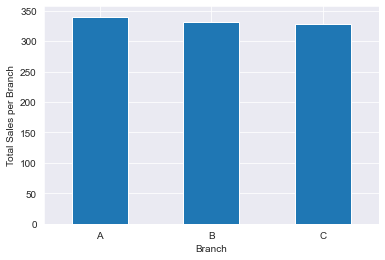

In [12]:
sms_data['Branch'].value_counts().plot(kind  = "bar")
plt.xlabel("Branch")
plt.xticks(rotation = 360)
plt.ylabel("Total Sales per Branch")

<Font color="gray">Since there is not much difference in the total sales per branch for Branch A,B,C . 
But the highest Sales per Branch is for A<Font>

Text(0, 0.5, 'Total Payment per Type')

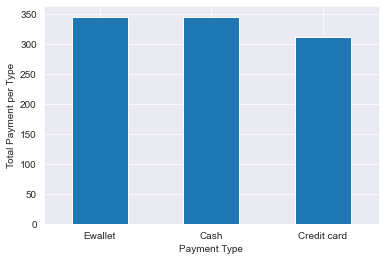

In [13]:
sms_data["Payment"].value_counts().plot(kind = "bar")
plt.xlabel("Payment Type")
plt.xticks(rotation = 360)
plt.ylabel("Total Payment per Type")

<Font color="gray">Ewallet and the Cash payment type was used in the majority .
Credit Card is least favourite</Font>

## Bivariate Analysis

<font color="gray">Bivariate analysis is done to study the effect of one variable over the another variable.</font>

In [14]:
sms_data["gross income"].head()

0    26.1415
1     3.8200
2    16.2155
3    23.2880
4    30.2085
Name: gross income, dtype: float64

In [15]:
sms_data["Rating"].head()

0    9.1
1    9.6
2    7.4
3    8.4
4    5.3
Name: Rating, dtype: float64

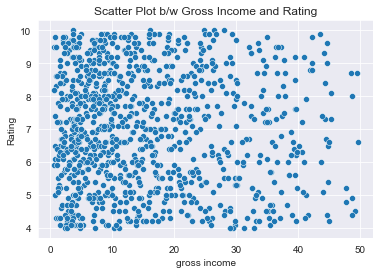

In [16]:
sns.scatterplot(x = sms_data["gross income"] , y =sms_data["Rating"])
plt.title("Scatter Plot b/w Gross Income and Rating")
plt.show()

In [17]:
regressor = LinearRegression()
regressor.fit(sms_data["gross income"].values.reshape(-1, 1) , sms_data["Rating"].values.reshape(-1 , 1))
print(regressor.coef_[0][0])
print(regressor.intercept_[0])

-0.0053487855125253165
7.054960946098981


In [18]:
x = sms_data["gross income"] 
y =sms_data["Rating"]
y = regressor.coef_[0][0] * x + regressor.intercept_[0]

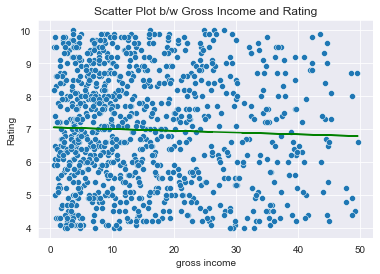

In [19]:
sns.scatterplot(x = sms_data["gross income"] , y =sms_data["Rating"])
plt.plot(x , y , color ="green")
plt.title("Scatter Plot b/w Gross Income and Rating")
plt.show()

<Font color="gray">The regression line is almost parellel to the x axis . Hence there is no relation ship between the Gross income and Rating</Font>

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

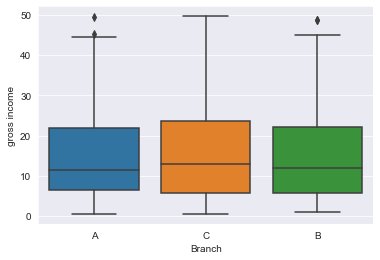

In [20]:
sns.boxplot(x = sms_data['Branch'] , y = sms_data['gross income'])

<Font color="gray">Since Gross income of C is slightly higher than A and B , Therefore C is most Profitable</Font>

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

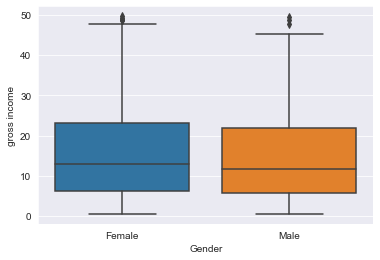

In [21]:
sns.boxplot(x = sms_data['Gender'] , y = sms_data['gross income'])

<Font color="gray">Gross income of Female is slightly higher at 75th percentile </Font>

## Gross income vs Date

<AxesSubplot:xlabel='Date'>

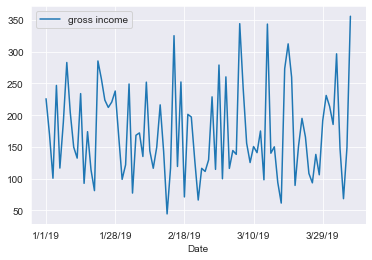

In [22]:
sms_data.groupby("Date").sum()[['gross income']].plot(kind = "line")

## Product line vs income

<AxesSubplot:xlabel='Product line'>

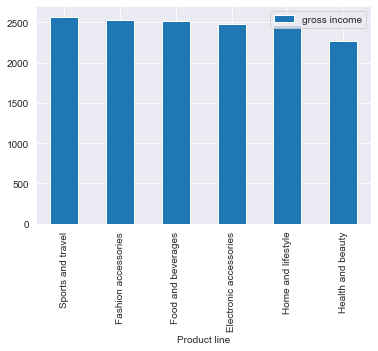

In [23]:
pd.DataFrame(sms_data.groupby('Product line').sum()["gross income"]).sort_values(by="gross income" , ascending = False).plot(kind="bar")

<Font color="gray">Health and beautity has least gross income and the sports and travel have largest gross income</Font>

## Correlation analysis

<AxesSubplot:>

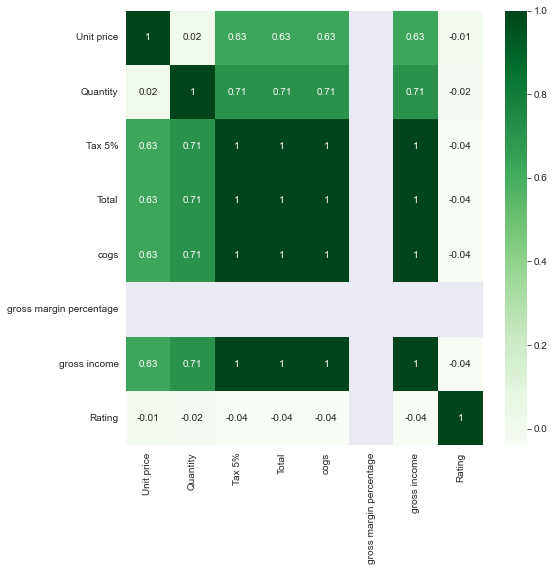

In [24]:
plt.figure(figsize = (8 , 8))
sns.heatmap(np.round(sms_data.corr() , 2) , annot = True , cmap = "Greens")

<Font color="gray">
    <ul>
        <li>A positive correlation means that the values of the 2 variables increase together</li>
        <li>A negative correlation means the values of one variable decrease with the other</li>
        <li>Zero correlation implies no correlation</li>
    </ul>
</Font>
Quantity and Gross income has highest corelation of 70%

In [25]:
sms_data['Gender Expenditure'] = sms_data['Unit price'] * sms_data['Quantity']
sms_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Gender Expenditure
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17


<AxesSubplot:xlabel='Gender'>

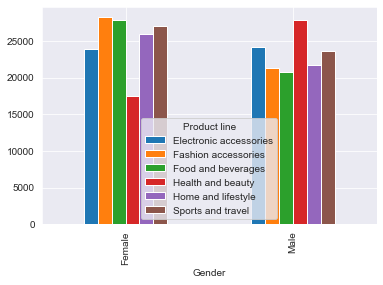

In [26]:
piv_sms_table = sms_data.groupby(['Product line' , 'Gender']).sum()[['Gender Expenditure']].pivot_table(index = "Gender" , columns="Product line" , values="Gender Expenditure")
piv_sms_table.plot(kind="bar")

<Font color="gray">
    <li>Female spend most of the money on fashion accessory</li>
    <li>Male spend most of the money in Health and Beauty</li>
</Font>

In [27]:
sms_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Gender Expenditure
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17


Text(0.5, 1.0, 'Count vs Quantity')

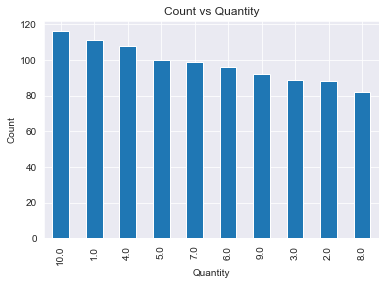

In [28]:
sms_data['Quantity'].value_counts().sort_values(ascending = False).plot(kind="bar")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.title("Count vs Quantity")

<Font color="gray">Majourity of people preffer **Quantity** : 10</Font>

<AxesSubplot:xlabel='Hours', ylabel='Quantity'>

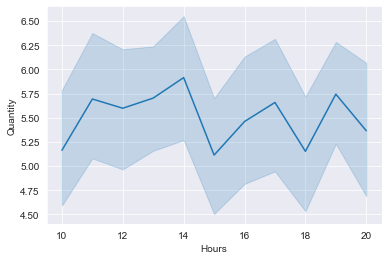

In [29]:
sms_data['Hours'] = pd.to_datetime(sms_data['Time']).dt.hour
sns.lineplot(x ="Hours" , y ="Quantity" , data  = sms_data)

Max sales done at 14 Hours time-stamp

Text(0.5, 1.0, 'Product line vs Rating ')

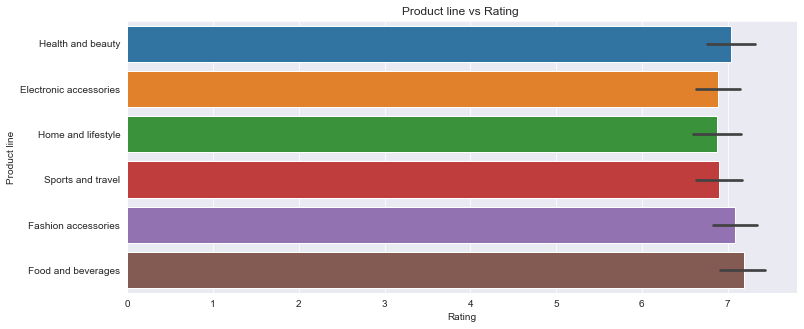

In [30]:
plt.figure(figsize = (12 , 5))
sns.barplot(y = sms_data['Product line'] , x = sms_data['Rating'])
plt.title('Product line vs Rating ')

They should focus more on Food and Beverages 

Text(0.5, 1.0, 'Gross income vs City')

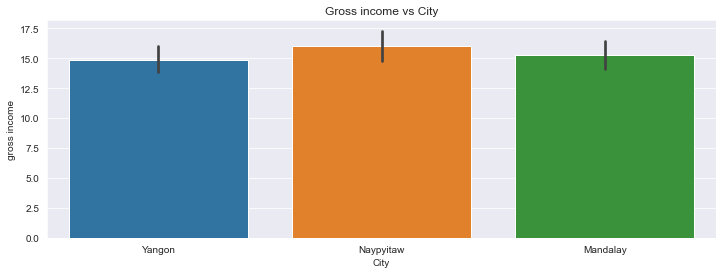

In [31]:
plt.figure(figsize = (12 , 4))
sns.barplot(x = sms_data['City'] , y =sms_data["gross income"])
plt.title("Gross income vs City")

In [32]:
sms_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Gender Expenditure,Hours
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,NaN,1.0,2.0175,42.3675,1/29/19,13:46,Ewallet,40.35,4.761905,2.0175,6.2,NaN,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,NaN,10.0,48.6900,1022.4900,3/2/19,17:16,Ewallet,973.80,4.761905,48.6900,4.4,NaN,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,NaN,1.0,1.5920,33.4320,2/9/19,13:22,Cash,31.84,4.761905,1.5920,7.7,NaN,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/19,15:33,Cash,65.82,4.761905,3.2910,4.1,65.82,15


Naypyitaw is the most profitable country to invest on 

<Center style="font-family: 'Helvetica Neue' ;font-size:35px; letter-spacing: 0.0625em ; color:white;background-image:url('black.jpg');padding:10px">Made By : Abhay Bisht</Center>